<a href="https://colab.research.google.com/github/sahrul3114/Case-Study-Clustering-Analysis-Association-Rule/blob/main/CP_02_Data_Mining_Kelompok_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CASE STUDY 2 - MixITup Ice Cream

Group I

Lecturer : Dr. Taufik Sutanto, MScTech

Grup Member :

- Nia Amalia  (11230940000012)
- Syahrul Akbar Ramdhani (11230940000027)
- Annisa Intan Nazila (11230940000031)
- Muhammad Amar Primus Firdaus (11230940000067)

### LOAD DATA

In [316]:
url = 'https://raw.githubusercontent.com/sahrul3114/Case-Study-Clustering-Analysis-Association-Rule/main/Case-Study-02-MixITup.xlsx'

In [317]:
import pandas as pd
df = pd.read_excel(url, sheet_name=2)
df

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,4098360,73,1,Depok,1.0,Senin,0
196,297,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,43032786,79,1,Depok,1.0,Senin,7
198,299,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0


### EXPLORATORY DATA ANALYSES

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  200 non-null    object 
 3   Pendapatan-per-bulan  200 non-null    int64  
 4   skor-pengeluaran      200 non-null    int64  
 5   Menikah               188 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 15.8+ KB


In [319]:
df.head(10)

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
5,106,Wanita,33,29098360,95,1,Depok,0.0,Senin,0
6,107,Pria,27,21311475,56,1,Jakarta,1.0,Senin,5
7,108,Wanita,24,2049180,77,1,Depok,1.0,Senin,3
8,109,Wanita,32,13524590,47,1,Jakarta,2.0,Selasa,6
9,110,Wanita,21,19262295,42,1,Jakarta,2.0,Senin,4


In [320]:
print("== Nilai Unique Kolom Favorit Flavour ==")
display(df['FavFlavor'].value_counts())
print("== Nilai Unique Kolom Kota ==\n")
display(df['Kota'].value_counts())
print("== Nilai Unique Kolom Promo == \n")
display(df['Menikah'].value_counts())
print("== Nilai Unique Kolom Jenis Kelamin == \n")
display(df['Jenis Kelamin'].value_counts())
print("== Nilai Unique Kolom Umur == \n")
display(df['Umur'].value_counts())
print("== Nilai Unique Kolom Promo == \n")
display(df['Promo'].value_counts())
print("== Nilai Unique Kolom skor-pengeluaran == \n")
display(df['skor-pengeluaran'].value_counts())
print("== Nilai Unique Kolom ID == \n")
display(df['ID'].value_counts())
print("== Nilai Unique Kolom HariFav == \n")
display(df['HariFav'].value_counts())
print("== Nilai Unique Kolom Pendapatan-per-bulan == \n")
display(df['Pendapatan-per-bulan'].value_counts())

== Nilai Unique Kolom Favorit Flavour ==


,count
FavFlavor,
0,40
2,20
6,20
3,20
7,20
5,20
1,20
4,20
8,19


== Nilai Unique Kolom Kota ==



,count
Kota,
Jakarta,87
Depok,59
Tangerang,53
JJakarta,1


== Nilai Unique Kolom Promo == 



,count
Menikah,
1,160
0,26
,1
-,1


== Nilai Unique Kolom Jenis Kelamin == 



,count
Jenis Kelamin,
Wanita,109
Pria,86
-,1


== Nilai Unique Kolom Umur == 



,count
Umur,
32,11
49,8
19,8
31,8
35,8
47,7
30,7
36,6
48,6


== Nilai Unique Kolom Promo == 



,count
Promo,
1.0,86
3.0,50
2.0,43
0.0,14
5.0,1


== Nilai Unique Kolom skor-pengeluaran == 



,count
skor-pengeluaran,
42,8
55,7
73,6
46,6
52,5
...,...
63,1
85,1
12,1


== Nilai Unique Kolom ID == 



,count
ID,
101,1
102,1
103,1
104,1
105,1
...,...
296,1
297,1
298,1


== Nilai Unique Kolom HariFav == 



,count
HariFav,
Senin,66
Sabtu,54
Minggu,43
Selasa,21
Kamis,6
Rabu,5
Jumat,5


== Nilai Unique Kolom Pendapatan-per-bulan == 



,count
Pendapatan-per-bulan,
15983606,12
25819672,12
13524590,6
29508196,6
19262295,6
...,...
31967213,2
24590163,2
43032786,2


In [321]:
df.isnull().sum()

,0
ID,0
Jenis Kelamin,4
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,12
Kota,0
Promo,6
HariFav,0
FavFlavor,0


In [322]:
df.describe()

,ID,Pendapatan-per-bulan,skor-pengeluaran,Promo,FavFlavor
count,200.000000,2.000000e+02,200.00000,194.000000,200.000000
mean,200.500000,1.867213e+07,50.47000,1.685567,3.605000
std,57.879185,1.076423e+07,26.07101,0.970603,2.743466
min,101.000000,0.000000e+00,1.00000,0.000000,0.000000
25%,150.750000,1.086066e+07,34.75000,1.000000,1.000000
50%,200.500000,1.905738e+07,50.00000,1.000000,3.500000
75%,250.250000,2.581967e+07,73.00000,3.000000,6.000000
max,300.000000,5.000000e+07,101.00000,5.000000,9.000000


In [323]:
df.duplicated().sum()

np.int64(0)

In [324]:
import numpy as np

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    print(f"Checking outliers for column: {col}")
    # Hitung Q1, Q3, dan IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan atas
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    # Cek data outlier
    outlier = df[(df[col] < batas_bawah) | (df[col] > batas_atas)]

    # Tampilkan hasil
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"Batas bawah: {batas_bawah}")
    print(f"Batas atas: {batas_atas}")
    print("\nData outlier:")
    display(outlier)
    print("-" * 30) # Separator for clarity

Checking outliers for column: ID
Q1: 150.75
Q3: 250.25
IQR: 99.5
Batas bawah: 1.5
Batas atas: 399.5

Data outlier:


,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


------------------------------
Checking outliers for column: Pendapatan-per-bulan
Q1: 10860655.0
Q3: 25819672.0
IQR: 14959017.0
Batas bawah: -11577870.5
Batas atas: 48258197.5

Data outlier:


,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
66,167,Pria,30,50000000,83,1,Depok,1.0,Sabtu,3
102,203,Pria,32,50000000,18,NaN,Tangerang,3.0,Senin,6


------------------------------
Checking outliers for column: skor-pengeluaran
Q1: 34.75
Q3: 73.0
IQR: 38.25
Batas bawah: -22.625
Batas atas: 130.375

Data outlier:


,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


------------------------------
Checking outliers for column: Promo
Q1: 1.0
Q3: 3.0
IQR: 2.0
Batas bawah: -2.0
Batas atas: 6.0

Data outlier:


,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


------------------------------
Checking outliers for column: FavFlavor
Q1: 1.0
Q3: 6.0
IQR: 5.0
Batas bawah: -6.5
Batas atas: 13.5

Data outlier:


,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


------------------------------


VISUALISASI


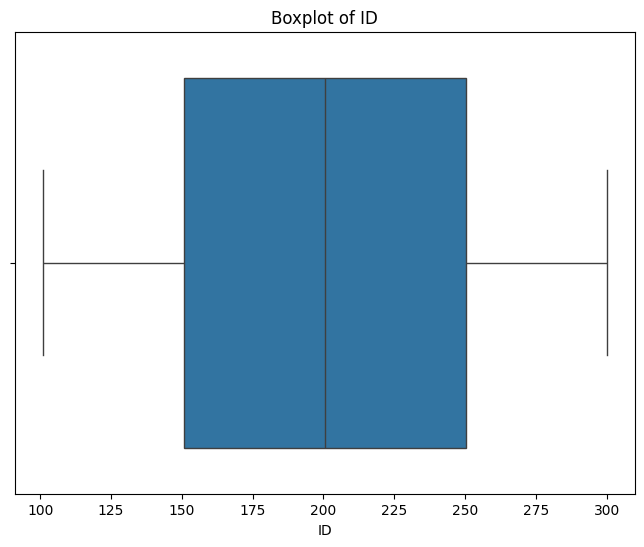

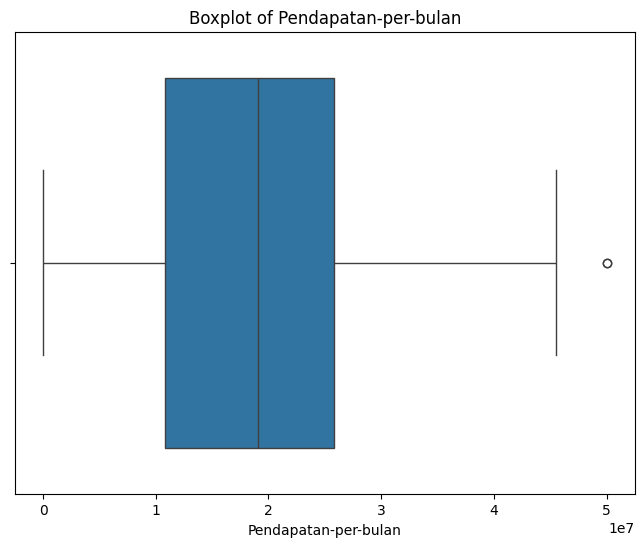

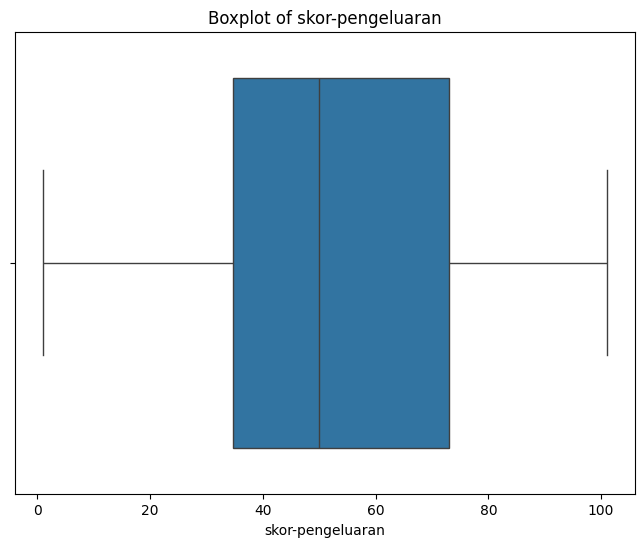

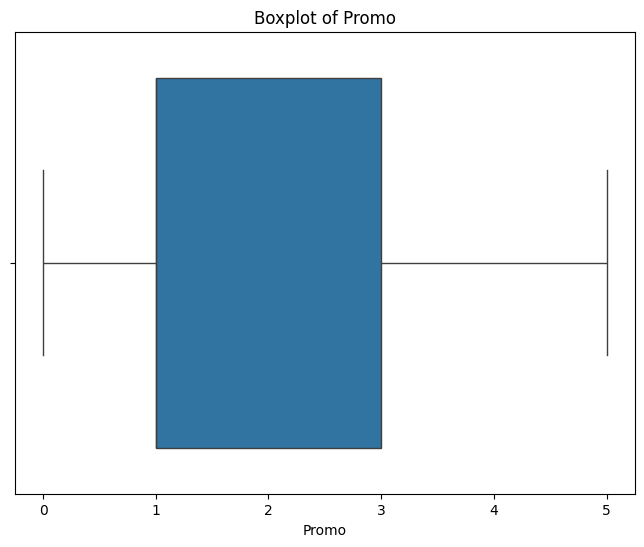

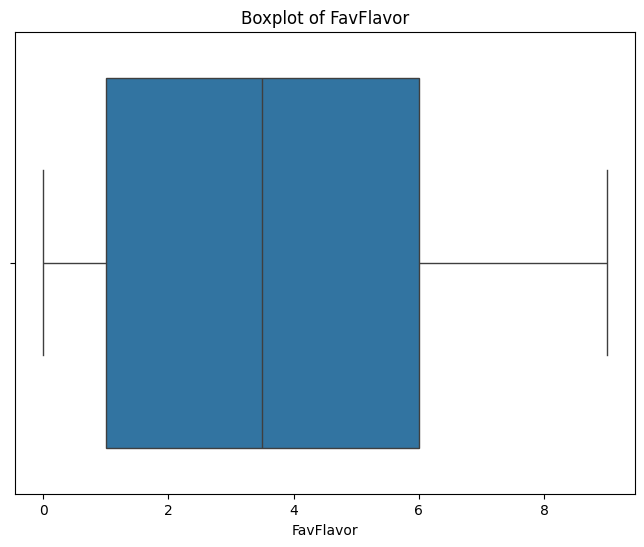

In [325]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

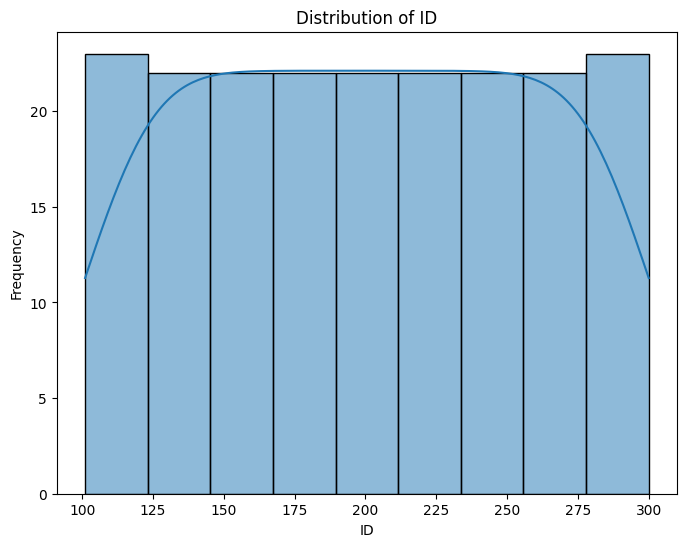

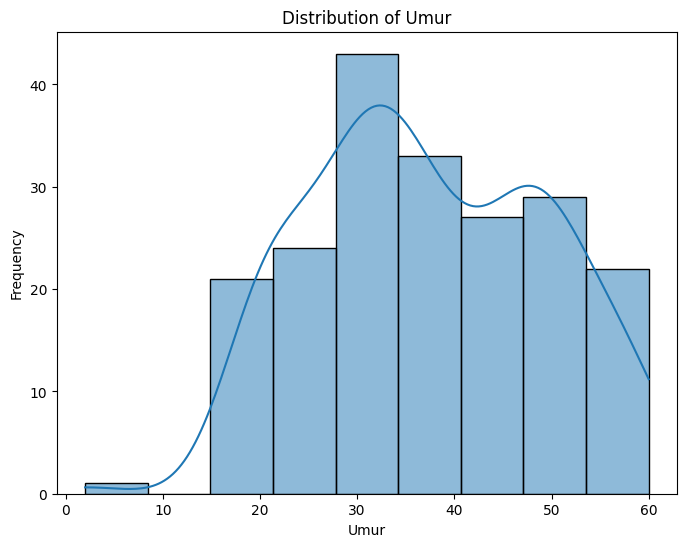

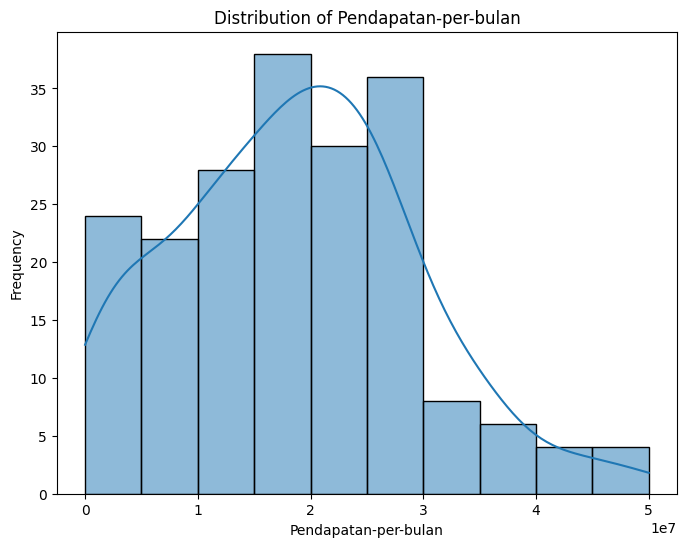

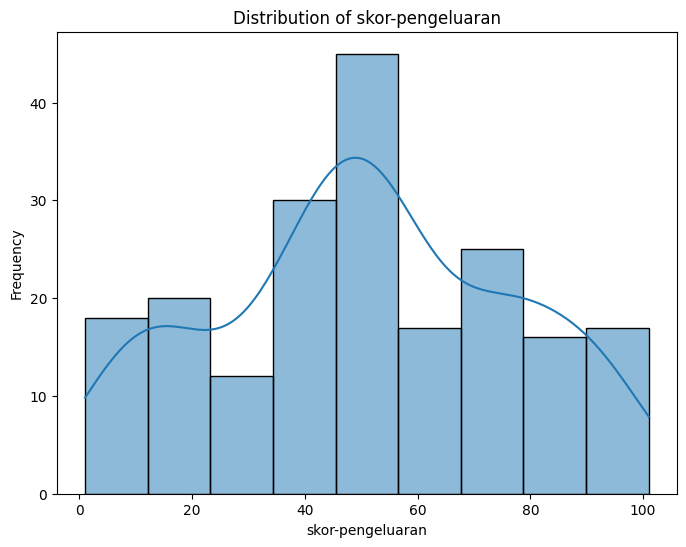

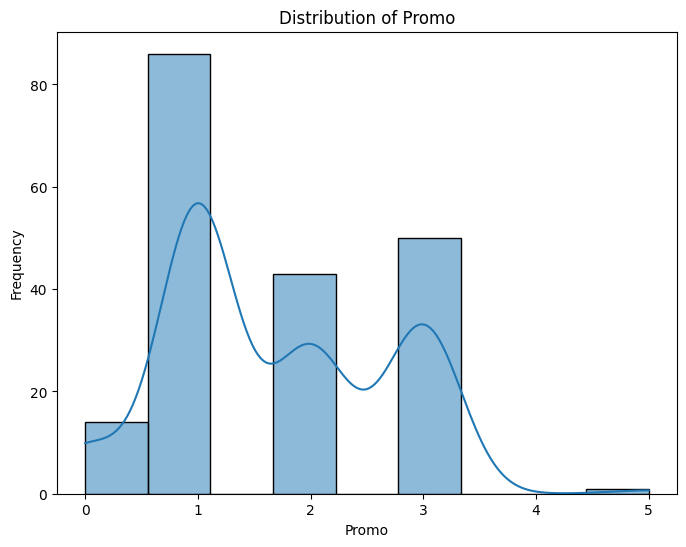

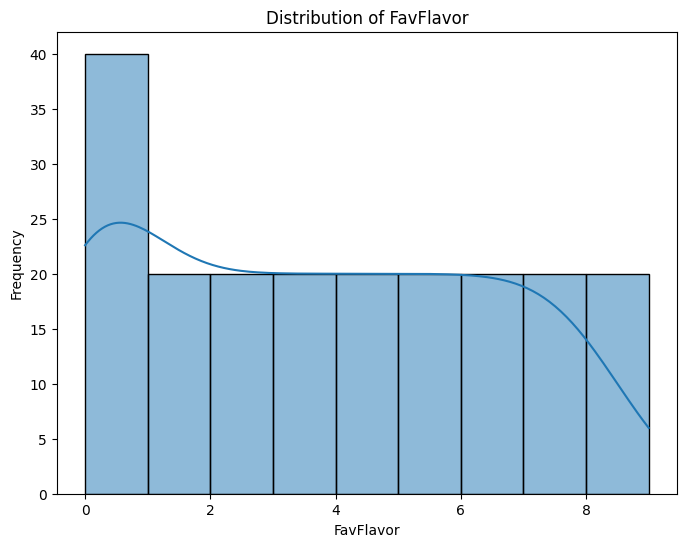

In [326]:
df['Umur'] = df['Umur'].astype(str).apply(lambda x: re.sub(r'[^0-9.]', '', x))
df['Umur'] = pd.to_numeric(df['Umur'], errors='coerce')

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col].dropna(), kde=True)  # Drop NaN values for plotting
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### PRE-PROCESSING

In [327]:
df['Jenis Kelamin'].unique()

array(['Wanita', 'Pria', nan, '-'], dtype=object)

In [328]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].replace('-', np.nan)

In [329]:
df['Jenis Kelamin'].isna().sum()

np.int64(5)

In [330]:
df = df.dropna(subset = ['Jenis Kelamin'])

In [331]:
df['Jenis Kelamin'].isna().sum()

np.int64(0)

In [332]:
df['Menikah'].unique()

array([1, 0, nan, ' ', '-'], dtype=object)

In [333]:
df['Menikah'] = df['Menikah'].replace('-', np.nan)

/tmp/ipython-input-993514160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Menikah'] = df['Menikah'].replace('-', np.nan)


In [334]:
df['Menikah'] = df['Menikah'].replace(' ', np.nan)

/tmp/ipython-input-1154027324.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Menikah'] = df['Menikah'].replace(' ', np.nan)
/tmp/ipython-input-1154027324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Menikah'] = df['Menikah'].replace(' ', np.nan)


In [335]:
df[df['Menikah'].isna()]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
15,116,Wanita,51,11885245,50,NaN,Jakarta,1.0,Minggu,2
33,134,Wanita,38,21311475,40,NaN,Jakarta,2.0,Selasa,7
42,143,Pria,39,25819672,88,NaN,Depok,1.0,Minggu,0
82,183,Wanita,31,27049180,93,NaN,Depok,0.0,Selasa,0
90,191,Wanita,36,29508196,27,NaN,Tangerang,3.0,Minggu,5
97,198,Wanita,51,21311475,43,NaN,Jakarta,2.0,Minggu,3
102,203,Pria,32,50000000,18,NaN,Tangerang,3.0,Senin,6
105,206,Pria,35,3688524,35,NaN,Tangerang,2.0,Senin,6
126,227,Wanita,47,18442622,101,NaN,Jakarta,2.0,Minggu,7
134,235,Wanita,35,2459016,35,NaN,Tangerang,3.0,Senin,5


In [336]:
df['Menikah'] = df['Menikah'].fillna(df['Menikah'].mode()[0])

/tmp/ipython-input-1777915054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Menikah'] = df['Menikah'].fillna(df['Menikah'].mode()[0])


In [337]:
df.isna().sum()

,0
ID,0
Jenis Kelamin,0
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,0
Kota,0
Promo,6
HariFav,0
FavFlavor,0


In [338]:
df['Umur'].unique()

array([49, 32, 51, 19, 38, 33, 27, 24, 21, 31, 36, 46, 60, 58, 47, 45, 22,
       18, 59, 44, 39, 35, 20, 30, 23, 48, 37, 40, 34, 41, 53, 54, 28, 55,
       25, 50, 42, 29, 43, 52,  2, 56, 26, 57])

In [339]:
df = df[df['Umur'] >= 10]

In [340]:
df['Promo'].value_counts()

,count
Promo,
1.0,85
3.0,48
2.0,40
0.0,14
5.0,1


In [341]:
df.groupby('Promo')['skor-pengeluaran'].mean()

,skor-pengeluaran
Promo,
0.0,93.714286
1.0,65.988235
2.0,44.050000
3.0,15.958333
5.0,15.000000


In [342]:
df['Promo'] = df['Promo'].replace(5, 3)

In [343]:
df[df['Promo'].isna()]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
10,111,Wanita,31,11475409,54,1.0,Jakarta,NaN,Senin,6
64,165,Wanita,31,10245901,42,1.0,Jakarta,NaN,Minggu,6
95,196,Wanita,30,29918032,86,1.0,Depok,NaN,Minggu,5
132,233,Wanita,31,819672,40,1.0,Jakarta,NaN,Minggu,6
151,252,Pria,30,34426229,97,1.0,Depok,NaN,Sabtu,0
194,295,Wanita,31,9836065,61,1.0,Jakarta,NaN,Jumat,3


In [344]:
promo_means = {
    0.0: 93.714286,
    1.0: 65.988235,
    2.0: 44.05,
    3.0: 15.958333
}

In [345]:
def imputasi_promo(skor):
    # Hitung selisih absolut skor dengan rata-rata tiap promo
    selisih = {promo: abs(skor - mean) for promo, mean in promo_means.items()}
    # Ambil promo dengan selisih terkecil
    return min(selisih, key=selisih.get)

In [346]:
df.loc[df['Promo'].isna(), 'Promo'] = df.loc[df['Promo'].isna(), 'skor-pengeluaran'].apply(imputasi_promo)

In [347]:
df.loc[df['ID'].isin([111, 165, 196, 233, 252, 295]), ['ID', 'skor-pengeluaran', 'Promo']]

,ID,skor-pengeluaran,Promo
10,111,54,2.0
64,165,42,2.0
95,196,86,0.0
132,233,40,2.0
151,252,97,0.0
194,295,61,1.0


In [348]:
df['Promo'].isna().sum()

np.int64(0)

In [349]:
df.isna().sum()

,0
ID,0
Jenis Kelamin,0
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,0
Kota,0
Promo,0
HariFav,0
FavFlavor,0
